In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import_libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from numpy import arange,array,ones
from scipy import stats
from sklearn import svm
from sklearn.svm import SVR
from scipy.interpolate import *
import statistics as st
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import pathlib
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import arange,array,ones
from scipy import stats
from scipy.interpolate import *
import statistics as st
from sklearn import svm
from sklearn.svm import SVR
###############################
# ### ## tensorflow
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from numpy.random import seed
# seed(1)
# from tensorflow import set_random_seed
# set_random_seed(2)

In [3]:
#please mention data file name here
filename ='/content/drive/My Drive/Colab Notebooks/GaBP2/HyperPartmerTune/Other_Model_Tune/PLS/descriptor_ABX2.csv' 
dataset = pd.read_csv(filename)
### check if any data is missing
dataset.isna().sum() 
### remove the line with missing data if any 
dataset = dataset.dropna()
#Remove the column with only text  and target column in X_1 by using their header
X_1 = dataset.drop(['BandGap','compound','Ksgap'], axis=1)
#mention the column header of target here
Y = dataset['BandGap']
X = preprocessing.scale(X_1)
print(X_1.columns.values.tolist())
print(len(X_1.columns.values.tolist()))

['AM1', 'AN1', 'Period1', 'group1', 'First_IE1', 'Second_IE1', 'elctron_AF1', 'paulielctrneg1  ', 'Allen_electneg1', 'vand_rad1', 'cov_rad1', 'atom_rad1', 'metling1', 'boiling1', 'density1', 'molarVol1', 'heat_fus1', 'heat_vap1', 'thermal_con1', 'spec_heat1', 'AM2', 'AN2', 'Period2', 'group2', 'First_IE21', 'Second_IE12', 'elctron_AF2', 'paulielctrneg2', 'Allen_electneg2', 'vand_rad2', 'cov_rad2', 'atom_rad2', 'metling2', 'boiling2', 'density2', 'molarVol2', 'heat_fus2', 'heat_vap2', 'thermal_con2', 'spec_heat2', 'AM3', 'AN3', 'Period3', 'group3', 'First_IE3', 'Second_IE3', 'elctron_AF3', 'paulielctrneg3  ', 'Allen_electneg3', 'vand_rad3', 'cov_rad3', 'atom_rad3', 'metling3', 'boiling3', 'density3', 'molarVol3', 'heat_fus3', 'heat_vap3', 'thermal_con3', 'spec_heat3', 'ST', 'KT', 'CP', 'Volume']
64


In [4]:
#for n in range (1,100):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=20)

for i in range (1,len(X_1.columns.values.tolist()),1):
#       for max_features in range (2,len(X_1.columns.values.tolist())):
#         for max_depth in range (1,10):
            model = PLSRegression(n_components=i)
            #model = RandomForestRegressor(n_estimators=i, max_features=max_features,max_depth=max_depth)
            model.fit(X_train, Y_train)
            y_train_predict = model.predict(X_train)
            rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
            r2 = r2_score(Y_train, y_train_predict)
            y_test_predict = model.predict(X_test)
            rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
            r2_test = r2_score(Y_test, y_test_predict)
##write output in a file named out.csv in same directory
            with open('out.csv', mode='a') as out_file:
                 out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)      
            #out_writer.writerow(['%s' %i, max_features, max_depth, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
                 out_writer.writerow(['%s' %i, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
                 out_file.close()
from shutil import copyfile
copyfile('out.csv', 'cross-validation-out.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 12
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 12
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 12
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 12
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 12
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: 

'cross-validation-out.csv'

In [0]:
###here we import the out.csv file and printthe statistics 
data_stat=pd.read_csv('out.csv',  names = ["n_estimators", "RMSE-Train", "R^square train", "RMSE-test", "R^square test"])  
#print(data_stat)
#data_stat.describe().to_csv("stat-results.csv")

In [0]:
X1 = data_stat['RMSE-Train']
Y1 = data_stat['RMSE-test']

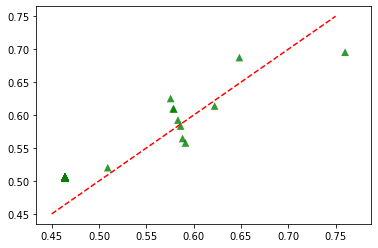

In [7]:
plt.scatter(X1, Y1, label='Training',facecolors='green',alpha=0.8, edgecolors='none',s=60,marker='^')
plt.plot((0.45,0.75),(0.45,0.75), 'r-',linestyle='dashed',label='y=x line')

In [8]:
#for n in range (1,100):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=20)

#for i in range (1,len(X_1.columns.values.tolist()),1):
#       for max_features in range (2,len(X_1.columns.values.tolist())):
#         for max_depth in range (1,10):
model = PLSRegression(n_components=11)
#model = RandomForestRegressor(n_estimators=i, max_features=max_features,max_depth=max_depth)
model.fit(X_train, Y_train)
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
##write output in a file named out.csv in same directory
with open('outN.csv', mode='a') as out_file:
    out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)      
            #out_writer.writerow(['%s' %i, max_features, max_depth, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
    out_writer.writerow(['{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
    out_file.close()
from shutil import copyfile
copyfile('outN.csv', 'cross-validation-outN.csv')

'cross-validation-outN.csv'

In [9]:
rmse


0.5092593829125925

In [10]:
rmse_test

0.5202273527193351